# Scipy : Librería Cientifica de Python

Referencia: Francisco J.Blanco-Silva Mastering SciPy.

[SciPy](http://www.scipy.org)  es la librería de  computación científica para Python, de hecho es más bien una colección de librerías para la computación científica de alto nivel, que son más o menos independientes unas de otras. La biblioteca SciPy se construye sobre  NumPy, que le  proporciona las estructuras de arrays básicas y las operaciones fundamentales en este tipo de arrays. Los módulos en SciPy proporcionan  computación de alto nivel para diversas áreas como:  


* Modelamiento y fijado de datos.
* Optimización
* Procesamiento de imaǵenes.
* Estadistica y probabilidades
* Clusters
* Interpolación
* Álgebra lineal
* etc.

Mayor información en [la documentación de Scipy](https://www.scipy.org/getting-started.html).
  
Scipy no tiene módulos de Analisis Bayesiano, es decir no tiene capacidades para **MCMC (Markov Chain Monte Carlo)**, pero existen otras alternativas como [PyMC](https://github.com/pymc-devs/pymc) o los [SciKits](https://scikits.appspot.com/).
 
 

## Optimización

Scipy contiene el módulo `optimize` para problemas de optimización no lineal númericos, donde la solución de los ceros de la derivada o del gradiente y probar el resultado como candidato de optimalidad no es factible.

In [1]:
import scipy
from scipy import optimize
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import os
import sys
import glob
%precision 4
plt.style.use('ggplot')
#help(optimize) 

In [24]:
# uso de optimize.brent

def fun1(x):
    return 2*np.pi*x**2 + 2/x
x_min = optimize.brent(fun1, brack=(0.1, 5))
x_min

0.5419

In [25]:
fun1(x_min)

5.5358

In [26]:
from scipy import optimize as opt

def f(x):
    return x**4 + 3*(x-2)**3 - 15*(x)**2 -7*(x) + 1

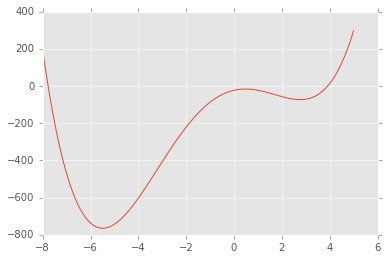

In [28]:
x = np.linspace(-8, 5, 100)
plt.plot(x, f(x));

In [29]:
# utilicemos minimize_escalar: funcion para encontrar minimos
opt.minimize_scalar(f, method='Brent')

 nfev: 12
    x: 2.7666774362281976
  fun: -73.240924695745946
  nit: 11

In [30]:
opt.minimize_scalar(f, method='bounded', bounds=[0, 6])

    nfev: 12
  status: 0
 success: True
       x: 2.7666777288226383
 message: 'Solution found.'
     fun: -73.24092469574272

In [31]:
# El algoritmo basin hooping. Ejemplo de la documentacion de scipy

from scipy.optimize import basinhopping
func = lambda x: np.cos(14.5 * x - 0.3) + (x + 0.2) * x
x0=[1.]
minimiza_metodo={"method":"BFGS"}
ret = basinhopping(func, x0, minimizer_kwargs=minimiza_metodo,
                  niter=200)
print("Minimo global: x = %.4f, f(x0) = %.4f" % (ret.x, ret.fun))

Minimo global: x = -0.1951, f(x0) = -1.0009


In [32]:
# En el caso de dos dimensiones

def func2d(x):
    f = np.cos(14.5 * x[0] - 0.3) +(x[1] +0.2) * x[1] + (x[0] + 0.2)*x[0]
    df = np.zeros(2)
    df[0] = -14.5 * np.sin(14.5 * x[0] - 0.3) + 2. * x[0] + 0.2
    df[1] = 2. * x[1] + 0.2
    return f, df

minimiza_metodo = {"method":"L-BFGS-B", "jac":True}
x0 = [1.0, 1.0]
ret = basinhopping(func2d, x0, minimizer_kwargs=minimiza_metodo,niter=200)

print("Minimo global: x = [%.4f, %.4f], f(x0) = %.4f" % (ret.x[0],ret.x[1], ret.fun))

Minimo global: x = [-0.1951, -0.1000], f(x0) = -1.0109


### Ajuste de datos y optimización

Hay un número de rutinas en Scipy para realizar ajuste de datos, por ejemplo `curve_fit`. Mayor información de esta rutina, se puede encontrar [aquí](http://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit).

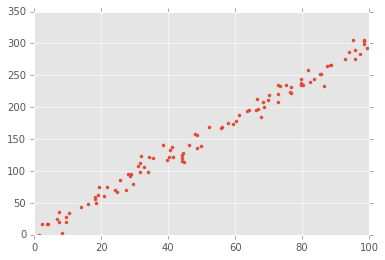

In [33]:
from scipy.optimize import curve_fit

x = np.random.uniform(0., 100., 100)
y = 3. * x + 2. + np.random.normal(0., 10., 100)
plt.plot(x, y, '.')

In [34]:
# Calculemos una linea de ajuste

def linea(x, a, b):
    return a * x + b

In [35]:
param, pcov = curve_fit(linea, x, y)
param

array([ 2.9568,  3.9455])

In [36]:
pcov

array([[  1.1675e-03,  -6.0036e-02],
       [ -6.0036e-02,   4.0461e+00]])

<Container object of 3 artists>

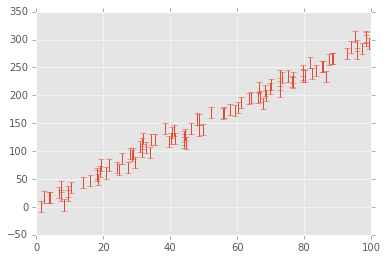

In [37]:
# probemos ahora asumiendo que los datos tengan una desviacion estandar
# de +/-10

import warnings
warnings.filterwarnings("ignore", module="matplotlib")
e = np.repeat(10., 100)
plt.errorbar(x, y, yerr=e, fmt=None)

In [38]:
param, pcov = curve_fit(linea, x, y, sigma=e)
param

array([ 2.9568,  3.9455])

In [39]:
print ("a =", param[0], "+/-", pcov[0,0]**0.5)
print ("b =", param[1], "+/-", pcov[1,1]**0.5)

a = 2.95680242445 +/- 0.0341683871634
b = 3.94553836911 +/- 2.01149576632


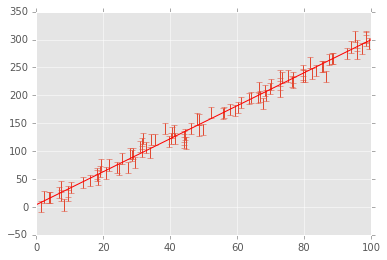

In [40]:
# Graficamos la linea de mejor ajuste

plt.errorbar(x, y, yerr=e, fmt=None)
xfine = np.linspace(0., 100., 100)  # define valores para la funcion 
plt.plot(xfine, linea(xfine, param[0], param[1]), 'r-')

### El método del gradiente

El método del gradiente es un algoritmo de optimización utilizado para encontrar el mínimo local de una función, que se  utiliza en muchos  algoritmos del machine learning. 

El gradiente (o Jacobiano) en un punto indica la dirección para la que hay un mayor grado de inclinación. Dado que estamos buscando un mínimo, una posibilidad  es la de tomar  un paso en la dirección opuesta al gradiente. Estamos ponderando el  tamaño del paso por un factor $\alpha$ conocido en machine learning como `tasa de aprendizaje`.

Si $\alpha$ es pequeño, el algoritmo puede converger hacia un mínimo local, tomando mucho  tiempo. Si $\alpha$ es grande, el algoritmo puede converger más rápido, pero también puede sobrepasarse y nunca encontrar el mínimo.  

Este método  es de primer orden, ya que se requiere el cálculo de la primera derivada en cada iteración.

Como se menciona en algunos textos, algunos algoritmos determinan el valor apropiado de $\alpha$ en cada escenario (paso) realizando una búsqueda lineal:

$$
\alpha^* =  \operatorname*{arg\,max}_{\alpha}f(x_k -\alpha \nabla f(x_k))
$$

el cual es un problema de optimización 1D.

In [41]:
def rosen(x):
    """ Version generalizada de la funcion de  Rosenbrock """
    return sum(100*(x[1:]-x[:-1]**2.0)**2.0 +(1-x[:-1])**2.0)

In [42]:
# Ejemplo tomado desde people.duke.edu

def rosen_der(x):
    """Derivada de la funcion Rosen generalizada."""
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

In [43]:
# Implementacion para la funcion de Rosen
from scipy import linalg as la
def mdg(fun, x0, args=(), maxfev=None, alpha=0.0002,maxiter=100000, tol=1e-10, callback=None, **options):
    
    mejorx = x0
    mejory = fun(x0)
    funcllam = 1
    niter = 0
    mejor = True
    alto = False

    while mejor and not alto and niter < maxiter:
        niter += 1
        # las proximas  2 lineas son descenso de gradiente
        paso = alpha * rosen_der(mejorx)
        mejorx = mejorx - paso

        mejory = fun(mejorx)
        funcllam += 1

        if la.norm(paso) < tol:
            mejor= False
        if callback is not None:
            callback(mejorx)
        if maxfev is not None and funcllam>= maxfev:
            alto = True
            break

    return opt.OptimizeResult(fun=mejory, x=mejorx, nit=niter,
                              nfev=funcllam, success=(niter > 1))

In [44]:
def reporter(p):
    """ funcion  que captura estados intermedios de  optimizacion."""
    global ps
    ps.append(p)

In [45]:
# inicializando el punto

x0 = np.array([4,-4.1])
ps = [x0]
opt.minimize(rosen, x0, method=mdg, callback=reporter)

    nfev: 100001
       x: array([ 0.9999,  0.9998])
 success: True
     nit: 100000
     fun: 1.0604663473448339e-08

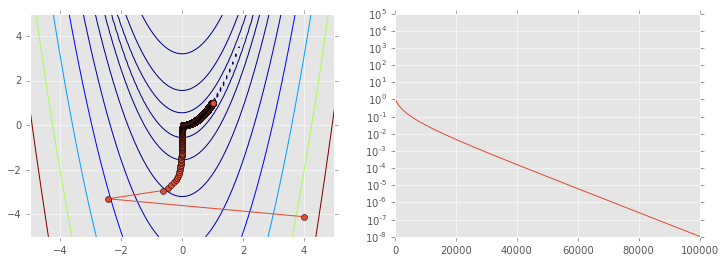

In [47]:
# Realizemos un gráfico del metodo de gradiente con la funcion Rosen

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = rosen(np.vstack([X.ravel(), Y.ravel()])).reshape((100,100))

ps = np.array(ps)
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.contour(X, Y, Z, np.arange(10)**5)
plt.plot(ps[:, 0], ps[:, 1], '-o')
plt.subplot(122)
plt.semilogy(range(len(ps)), rosen(ps.T));

## Integración 

En Scipy el principal propósito de la integración es obtener soluciones numéricas. Dependiendo de las propiedades
del integrando (la función que se integra) y los límites de integración,  puede ser fácil o difícil
numéricamente calcular una integral.

Las integrales dobles e integrales de orden superior pueden ser numéricamente calculadas con repetidos  cálculos de  integración de una sola dimensión, o con el uso de métodos que son generalizaciones multidimensionales de las técnicas
utilizado para resolver las integrales unidimensionales. 

Sin embargo, la complejidad computacional crece rápidamente con el número de dimensiones  y en la práctica estos métodos sólo son factibles para integrales de bajas dimensiones ,  como las integrales dobles o triples integrales. Integrales de dimensión más elevada  requieren  técnicas diferentes , como el algoritmo de Monte Carlo.

Calculemos como ejemplo: $$ \int_{0}^3 \cos^2(e^x) \ dx$$

In [2]:
import numpy as np 
from scipy.integrate import quad

# Defininamos la funcion a integrar

func = lambda x: np.cos(np.exp(x))**2

# Integrar la función con los limites 0 y 3 respectivamente

solucion = quad(func, 0,3)
print(solucion)

(1.296467785724373, 1.397797133112089e-09)


El primer elemento es el valor deseado y el segundo es el error  en el ejemplo anterior.  Hagamos un dibujo de este ejemplo:

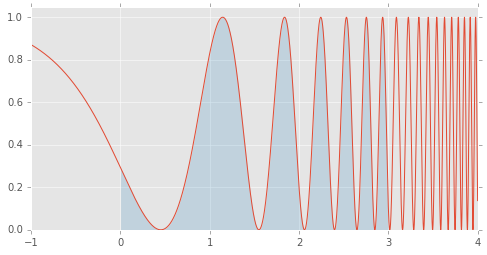

In [4]:
# La integral definida (azul) de una función

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
x1 = np.linspace(-1, 4, 10000)
x2 = np.linspace(0, 3, 10000)
ax.plot(x1, func(x1), label='Funcion')
ax.fill_between(x2, 0, func(x2), alpha=0.2)
ax.set_xlim(-1, 4)
ax.set_ylim(0, 1.05)

plt.show()

Ejercicio: Calcula lo siguiente $$\int_{0}^{1}\sin(x^2)\ dx$$

###  Integración numérica

Tenemos aquí un problema donde tenemos datos en lugar de alguna ecuación y la integración númerica es necesaria.

In [6]:
import numpy as np
from scipy.integrate import quad, trapz

# Colocando los datos simulados (fake dates )

x = np.sort(np.random.randn(150)*4 + 4).clip(0,5)
func = lambda x: np.sin(x) *np.cos(x ** 2) + 1 
y = func(x)

# Itegrando desde los limites : 0 y 5
fsolucion = quad(func, 0, 5)
dsolucion = trapz(y, x =x)

print("fsolucion = " + str(fsolucion[0]))
print("dsolucion = " +  str(dsolucion))

print(" La diferencia entre estos dos metodos es " \
      +  str(np.abs(fsolucion[0] -dsolucion)))

fsolucion = 5.100345067540932
dsolucion = 5.08056629063
 La diferencia entre estos dos metodos es 0.019778776906


Realicemos un gráfico de este ejemplo:

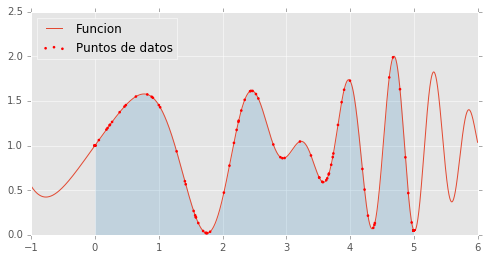

In [8]:
# integral definida de una funcion. La funcion original
# y los puntos de datos

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)
x1 = np.linspace(-1, 6, 10000)
x2 = np.linspace(0, 5, 10000)

ax.plot(x1, func(x1), label='Funcion')
ax.fill_between(x2, 0, func(x2), alpha=0.2)
ax.scatter(x, y, marker='o', edgecolor='none', facecolor='red',
           s=7, zorder=3, label='Puntos de datos')
ax.legend(loc='upper left')
ax.set_xlim(-1, 6)
ax.set_ylim(0, 2.5)
plt.show()

### Integración  de MonteCarlo

Supongamos que queremos encontrar los valores de $\int_{a}^{b}f(x)dx$ en alguna región con volumen V. La integración de Montecarlo estima esta integral, calculando la fracción de puntos que caen por debajo de $f(x)$ multiplicado por V. 

En el contexto estadístico, la integración de Montecarlo, se utiliza para la estimación de la esperanza: Sea $g:\mathbb{R} \rightarrow \mathbb{R}$, por definición la esperanza es:

$$
E_f(g(X)) = \int_{X}g(x)f_{X}(x)dx
$$

con 
$$
\bar{g_n} = \frac{1}{n}\sum_{i = 1}^{n}g(x_i),
$$

donde  $x_i \sim f$ de la función densidad $f$.

Podemos estimar la varianza de Montecarlo, de la aproximación como:

$$
v_n = \frac{1}{n^2}\sum_{i =1}^{n}[h(x_i) - \bar{g_n}]^2.
$$

De manera más compacta, debido al [teorema del Límite Central](https://terrytao.wordpress.com/2008/06/18/the-strong-law-of-large-numbers/), para $n$ muy grande

$$
\frac{\bar{g_n} - E_{f}(g(X))}{\sqrt{v_n}}
$$


es aproximadamente distribuida como un variables $N(0,1)$y esto conduce a la construcción de un test de convergencia y límites de confianza sobre la aproximación $E_{f}(g(X))$. La convergencia de la integración de Monte Carlo es $O(n^{1/2})$ y es  independiente de la dimensión. De ahí que la integración Monte Carlo resulta útil para la integración de moderada y alta dimensión desde la integración numérica  converge a $O(n^d)$.

Incluso para los problemas de baja dimensión, la integración de Monte Carlo puede tener una ventaja cuando el volumen a ser integrado está concentrado en una región muy pequeña y podemos utilizar la información de la distribución para extraer muestras con mayor frecuencia en la región de importancia.




Veamos un ejemplo: La distribución de Cauchy es dado por 
    
$$
f(x) =\dfrac{1}{\pi(1 + x^2)},\ \    -\infty < x  < \infty 
$$

y supongamos que queremos calcular $P(X>4)$ usando Monte Carlo, es decir queremos estimar la cantidad:

$$
\int_{4}^{\infty}\dfrac{1}{\pi(1 + x^2)}dx
$$

usando a sustitución $y = 4/x$ se tiene 

$$
\int_{0}^{1}\dfrac{4}{\pi(16 + y^2)}dy
$$

Así que en estimador MC es 

$$
\dfrac{1}{n}\sum_{i=1}^{n}\dfrac{4}{\pi(16 + y_{i}^2)}
$$

donde $y_i \sim Uniform(0,1)$.

In [10]:
import scipy.stats as stats

h_1 = 1 - stats.cauchy().cdf(4)
h_1


0.0780

In [12]:
# veamos el estimador MC

n = 100
y = stats.uniform().rvs(n)
h_2 = 1.0/n * np.sum(4.0/(np.pi * (16 + y**2)))
h_2, np.abs(h_2 - h_2)/h_1

(0.0781, 0.0000)

## Scipy para data mining (mineria de datos)

Módulos a usar:

- `scipy.stats`: módulo de herramientas estadísticas
- `scipy.ndimage.measurements`: módulo  de análisis y organización  de datos.
- `scipy.spatial`.
- `scipy.cluster`

El paquete `scipy.cluster` consiste de dos módulos: `scipy.cluster.vq` y `scipy.cluster.hierarchy`.

## Cuantización de Vector (VQ)

Es un término que está asociado con el procesamiento de señales compresión de datos y clustering. En este ejemplo nos vamos a centrar en la cuantización de vector como  componente clustering empezando con llenar de datos al paquete VQ de manera de identificar los cluster:

In [13]:
import numpy as np
from scipy.cluster import vq

# Creando datos

c1 = np.random.randn(100, 2) + 5
c2 = np.random.randn(30, 2) - 5
c3 = np.random.randn(50,2)

# Creando una matriz para juntar datos (array de 180x2)

data = np.vstack([c1, c2, c3])

# Calculando el centroide del cluster  y la varianza desde k-means

centroide, varianza = vq.kmeans(data, 3)

# Separando los puntos en el cluster basados en la funcion vq

identi, distancia = vq.vq(data, centroide)

# Recuperando las coordenadas para los puntos en cada vq

vqc1 = data[identi == 0]
vqc2 =data[identi == 1]
vqc3 = data[identi == 2]

In [14]:
centroide

array([[-0.0363, -0.1992],
       [ 4.9749,  4.7997],
       [-4.9574, -4.8543]])

In [15]:
varianza

1.2513

In [16]:
vqc1

array([[ 0.6902, -0.6452],
       [ 0.4401,  0.0401],
       [-0.5267,  1.6704],
       [ 1.178 , -0.9988],
       [-0.8563, -0.9288],
       [ 0.1998, -1.3247],
       [ 0.2594, -0.5114],
       [ 0.8053, -1.4381],
       [-0.7879,  0.0444],
       [ 0.1271, -0.9145],
       [-0.4674,  1.6759],
       [-1.581 , -0.5992],
       [-0.9656, -0.2795],
       [ 1.2432,  1.0316],
       [ 0.2601,  0.7441],
       [ 0.3091, -1.2185],
       [-0.6914, -1.4904],
       [ 0.8837,  0.307 ],
       [-0.9436, -0.4515],
       [ 0.2721,  0.0401],
       [ 0.1129, -1.0193],
       [ 0.6733,  0.0729],
       [ 0.9283,  0.6242],
       [ 0.2229, -1.7648],
       [-0.877 , -0.2734],
       [-0.5578, -1.05  ],
       [ 1.3737,  1.4275],
       [ 1.5406,  0.7539],
       [ 0.7744, -0.6073],
       [-0.4042,  2.2918],
       [ 0.0436,  1.3349],
       [-1.5888, -1.3835],
       [-1.2164, -0.0217],
       [ 1.2454, -0.7671],
       [-0.2446, -1.0879],
       [-0.3946, -0.9339],
       [ 1.0283,  0.6417],
 

## Jerarquía de clusters

Clustering es una técnica de data minning, cuyo proceso consiste en la división de datos en grupos de objetos similares. Cuando se representan la información obtenida a través de clusters se pierden algunos detalles de los datos, pero a la vez se simplifica dicha información.

Las técnicas de Clustering son las que utilizando algoritmos matemáticos se encargan de agrupar objetos. Usando la información que brindan las variables que pertenecen a cada objeto se mide la similitud entre los mismos, y una vez hecho esto se colocan en clases que son muy similares internamente (entre los miembros de la misma clase) y a la vez diferente entre los miembros de las diferentes clases. 

Un algoritmo importante se llama k-means:

Este algoritmo debe definir el número de clusters que se desean obtener, así se convierte en un algoritmo voraz para particionar. Este algoritmo funciona de la siguiente manera: primeramente se determina la cantidad de clusters en los que se quiere agrupar la información, en este caso las simulaciones. Luego se asume de forma aleatoria los centros por cada clusters. Una vez encontrados los primeros centroides el algoritmo hará los tres pasos siguientes:

1 . Determina las coordenadas del centroide.

2 . Determina la distancia de cada objeto a los centroides.

3 .Agrupa los objetos basados en la menor distancia.



Es una herramienta para identificar estructuras que están anidadas dentro de otras grandes estructuras. Hagamos un ejemplo para generar un sistema múltiple de cluster. Para emplear la función (hierarchy) que permite esto, hay que construir la MATRIZ DISTANCIA. 

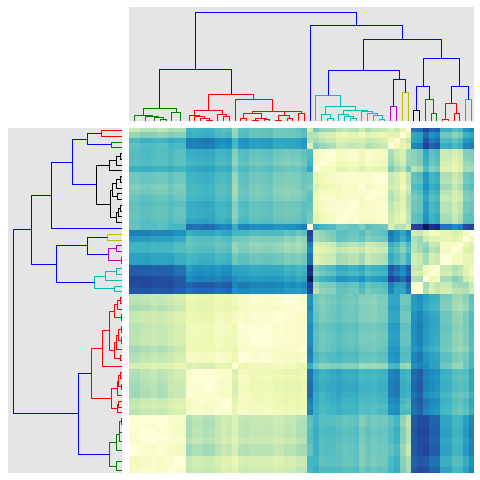

In [17]:
import numpy as np
import matplotlib.pyplot as mpl
#from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.distance import pdist, squareform
import scipy.cluster.hierarchy as hy

# Creando un cluster de una funcion clusters

def clusters(numbers = 20, cnumber = 5, csize  = 10):
    
    rnum  =np.random.rand(cnumber, 2)
    rn =rnum[:, 0] * numbers
    rn = rn.astype(int)
    rn[np.where(rn < 5)] = 5
    rn[np.where(rn > numbers/2.0)] = round(numbers/2., 0)
    ra = rnum[:, 1] * 2.9
    ra[np.where(ra < 1.5)]  =1.5
    
    cls = np.random.rand(numbers, 3) * csize
    
# Multiplicadores aleatorios para puntos centrales del cluster

    rxyz = np.random.rand(cnumber - 1, 3)
    for i in range(cnumber - 1):
        tmp = np.random.rand(rn[i +1], 3)
    
        x = tmp[:, 0] + (rxyz[i, 0] * csize)
        y = tmp[:, 1] + (rxyz[i, 1] * csize)
        z = tmp[:, 2] + (rxyz[i, 2] * csize)
    
        tmp = np.column_stack([x ,y, z])
        cls = np.vstack([cls, tmp])

    return cls

# Generamos un cluster de cluster y la matriz distancia

cls = clusters()
D = pdist(cls [:, 0:2])
D = squareform(D)
# Calculamos y dibujamos nuestro primer dendrograma
    
fig = mpl.figure(figsize=(8,8))
ax1 = fig.add_axes([0.09, 0.1, 0.2, 0.6])
Y1 = hy.linkage(D, method = 'complete')
cutoff = 0.3 *np.max(Y1[:,2])
Z1 = hy.dendrogram(Y1,  orientation = 'right', color_threshold =cutoff)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)

# Calculemos y dibujemos el segundo dendrograma
ax2 = fig.add_axes([0.3, 0.71, 0.6, 0.2])
Y2 = hy.linkage(D, method = 'average')
cutoff = 0.3 *np.max(Y2[:,2])
Z2 = hy.dendrogram(Y2,  color_threshold =cutoff)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)

    
# Graficando la matriz distancia

ax3 = fig.add_axes([0.3, 0.1, 0.6, 0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = D[idx1,:]
D = D[:, idx2]
ax3.matshow(D, aspect = 'auto', origin = 'lower', cmap = mpl.cm.YlGnBu)
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)
    
# Colores

fig.savefig('clusterq.pdf', bbox ='tight')


## Matrices Sparse 

¿ Qué pasaría si queremos manejar matrices de $10^{10}$ elementos?.

Si la matriz tiene muchos ceros, entonces es posible manejar de manera eficiente este tipo de matriz, que es llamada Sparse.

In [18]:
import numpy as np
from  scipy.sparse.linalg import eigsh
from  scipy.linalg import eigh
import scipy.sparse
import time

N = 300
#  Creamos una matriz aleatoria de tipos sparse

m = scipy.sparse.rand(N,N)
                     
a = m.toarray() # clon de Numpy para m
                      
print("El array de NUmpy tiene"  + str(a.nbytes) + ' bytes')
print("El matriz sparse tiene"  + str(m.data.nbytes) + ' bytes')

# No-sparse

t0 = time.time()
res1 = eigh(a)
dt = str(np.round(time.time() -t0, 3)) + 'segundos '
print("La operaciones no-sparse toman" + dt)

# sparse

t0 = time.time()
res1 = eigsh(m)
dt = str(np.round(time.time() -t0, 3)) + 'segundos '
print("La operaciones sparse toman" + dt)

El array de NUmpy tiene720000 bytes
El matriz sparse tiene7200 bytes
La operaciones no-sparse toman0.652segundos 
La operaciones sparse toman0.242segundos 


##  Estadística 

Numpy tiene  las funciones básicas de la estadística `mean`, `std`, `median`, `argmin` y `argmax ` , sin embargo  `numpy.arrays` tiene métodos construidos para las más importantes aplicaciones.

In [19]:
# Ejemplo de estadística

import numpy as np

# Construyamos un array aleatorio con 1000 elementos

x = np.random.rand(10000)

# Calcular varios métodos estadísticos que Numpy tiene

mean = x.mean()
std = x.std()
var = x.var()

In [20]:
mean

0.5021

In [3]:
std

0.2854488682881513

In [4]:
var

0.081481056406986357

Scipy contiene en el módulo [scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html) una extensa colección de herramientas para la estadistica y las probabilidades. como es el caso de las distribuciones continuas, discretas y multivariadas. 

Cuando llamamos a distribución desde `scipy.stats`, podemos extraer información de varias maneras: PDF, CDF, RVS. 

$$
PDF = e^{(-x^2/2)/\sqrt{2\pi}}
$$

In [7]:
# Ejemplo de probabilidades: PDF de la RV normal

import numpy as np
from scipy.stats import norm

# Rango de la muestra a tomar

x = np.linspace(-5, 5, 100000)

# Colocando los parametros para la distribucion normal

dist = norm( loc = 0, scale = 1)

# Recuperando PDF y CDF de la distribucion normal

pdf = dist.pdf(x)
cdf = dist.cdf(x)

# Recupperando RVS ( Muestreo de la variable aleatoria)
muestreo = dist.rvs(500) 

In [8]:
pdf

array([  1.48671951e-06,   1.48746306e-06,   1.48820696e-06, ...,
         1.48820696e-06,   1.48746306e-06,   1.48671951e-06])

In [9]:
cdf

array([  2.86651572e-07,   2.86800282e-07,   2.86949067e-07, ...,
         9.99999713e-01,   9.99999713e-01,   9.99999713e-01])

 Ejercicio: Hallar mediante `scipy.stats` el PMF, CDF y RVS de la distribución geométrica, cuyo PMF es
 
 $$
 PMF = (1 -p)^{k -1}p
 $$

In [16]:
import numpy as np
from scipy.stats import geom

# Parametros de la distribucion geometrica

p = 0.5
dist = geom(p)

# rango de valores 
x = np.linspace(0, 5, 1000)

# Recuperando PDF y CDF de la distribucion normal
pmf = dist.pmf(x)
cdf = dist.cdf(x)

# Recupperando RVS ( Muestreo de la variable aleatoria)
muestreo = dist.rvs(500) 

In [20]:
muestreo

array([ 1,  2,  1,  1,  3,  2,  1,  1,  3,  2,  1,  4,  1,  4,  1,  4,  1,
        2,  1,  1,  1,  1,  2,  1,  1,  2,  2,  1,  2,  2,  2,  1,  1,  1,
        1,  7,  4,  2,  1,  3,  1,  1,  6,  3,  3,  1,  5,  6,  1,  2,  2,
        1,  1,  1,  1,  3,  1,  3,  1,  1,  3,  1,  1,  3,  2,  2,  1,  1,
        1,  1,  1,  1,  2,  2,  1,  1,  1,  1,  2,  1,  1,  1,  1,  1,  1,
        1,  5,  3,  1,  1,  1,  1,  4,  2,  1,  2,  1,  1,  1,  1,  3,  1,
        3,  3,  8,  2,  2,  7,  1,  2,  2,  1,  3,  4,  1,  3,  4,  1,  3,
        2,  2,  2,  1,  1,  2,  1,  3,  1,  1,  4,  1,  8,  3,  1,  1,  2,
        5,  2,  2,  3,  3,  3,  4,  1,  1,  1,  2,  1,  2,  1,  1,  1,  1,
        3,  1,  1,  3,  1,  1,  2,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,
        2,  1,  1,  3,  1,  1,  2,  2,  3,  2,  2,  2,  1,  3,  1,  1,  2,
        2,  1,  1,  4,  2,  7,  5,  2,  1,  1,  3,  1,  1,  2,  1,  2,  4,
        2,  2,  5,  2,  1,  1,  3,  2,  1,  1,  3,  2,  1,  1,  2,  2,  1,
        5,  1,  2,  2,  1